<a href="https://colab.research.google.com/github/GAURAV9050/Interpretability-and-Explainability-in-AI-Systems-Models/blob/main/Final_EvaluationB_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy==1.26.4 --force-reinstall --no-cache-dir
!pip install scikit-learn==1.3.2 shap==0.44.1 lime==0.2.0.1 pandas matplotlib --force-reinstall --no-cache-dir


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 126.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
shap 0.50.0 requires numpy>=2, but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
jax 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
jaxlib 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
pytensor 2.35.1 r

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 341.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 298.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 256.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 245.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 151.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.3/112.3 kB 208.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 144.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 214.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 213.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━

Installing xgboost and shap...

--- Libraries installed and imported successfully! ---

--- Loading and preparing data... ---
Data split: 455 training samples, 114 test samples.

--- 1. Training black-box model (XGBoost)... ---
Model trained. Test Accuracy: 0.9561

--- 2. Applying XAI method (SHAP)... ---


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:01:57] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Creating SHAP explainer using shap.Explainer(model.predict, X_test)...
Calculating SHAP values for the test set...


PermutationExplainer explainer: 115it [00:14,  2.52it/s]
/tmp/ipython-input-1616448528.py:59: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)


SHAP values calculated.

--- 3. Visualizing Explanations (See plots below) ---

Displaying Global Feature Importance (Beeswarm Plot):


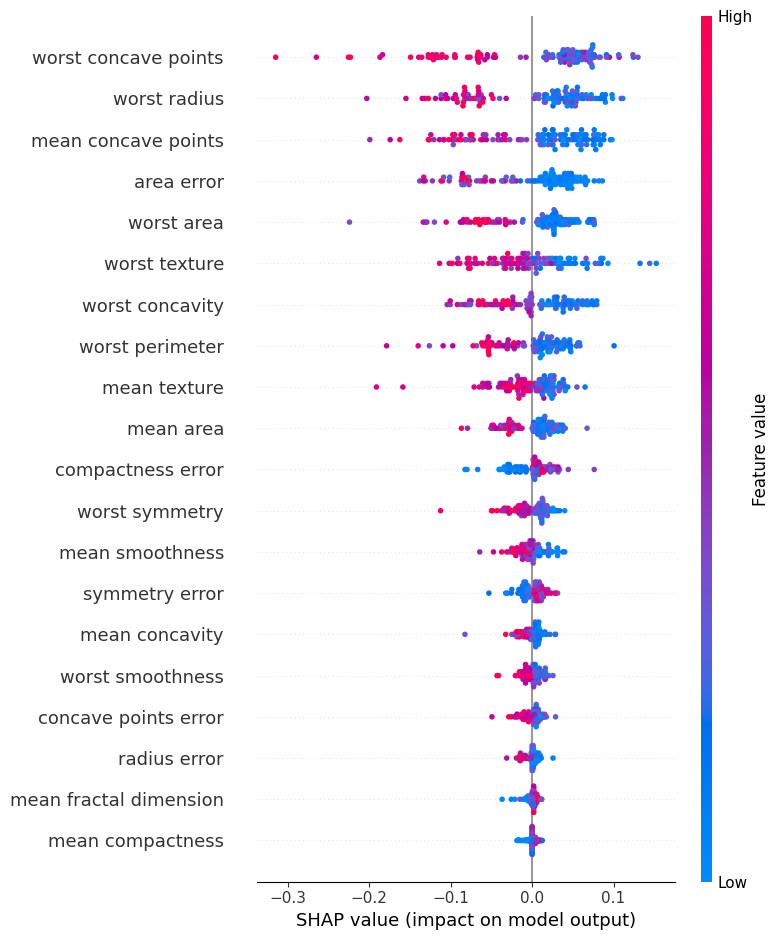


Displaying Local Explanation for a Single Prediction (Force Plot):

--- Process complete. Check the output above this cell for the plots. ---


In [ ]:
# -------------------------------------------------------------------
#  Complete Google Colab Example: Explaining XGBoost with SHAP
#  (Corrected for XGBoost >= 2.0 and SHAP API)
# -------------------------------------------------------------------

# Step 0: Install libraries
print("Installing xgboost and shap...")
!pip install xgboost shap -q

# --- Import all necessary libraries ---
import xgboost
import shap
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

print("\n--- Libraries installed and imported successfully! ---")

# --- Load and Prepare Data ---
print("\n--- Loading and preparing data... ---")
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Data split: {len(X_train)} training samples, {len(X_test)} test samples.")


# --- 1. Select and Train Black-Box ML Model (XGBoost) ---
print("\n--- 1. Training black-box model (XGBoost)... ---")
model = xgboost.XGBClassifier(eval_metric='logloss', use_label_encoder=False, base_score=0.5)
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print(f"Model trained. Test Accuracy: {accuracy:.4f}")


# --- 2. Select and Apply Interpretable AI Method (SHAP) ---
print("\n--- 2. Applying XAI method (SHAP)... ---")

# Initialize the SHAP JavaScript visualization library
shap.initjs()

print("Creating SHAP explainer using shap.Explainer(model.predict, X_test)...")
explainer = shap.Explainer(model.predict, X_test)

# Calculate SHAP values for our test set
print("Calculating SHAP values for the test set...")
shap_values = explainer(X_test)

print("SHAP values calculated.")


# --- 3. Evaluate and Visualize the Explanations ---
print("\n--- 3. Visualizing Explanations (See plots below) ---")

# Plot 1: Global Feature Importance (Beeswarm Plot)
print("\nDisplaying Global Feature Importance (Beeswarm Plot):")
shap.summary_plot(shap_values, X_test)


# Plot 2: Local Interpretability (Force Plot for a single prediction)
print("\nDisplaying Local Explanation for a Single Prediction (Force Plot):")
shap.force_plot(shap_values[0])


print("\n--- Process complete. Check the output above this cell for the plots. ---")